## **1. Business Understanding**<hr>

## **2. Data Understanding**<hr>

In [1]:
# data manipulation
import numpy as np
import pandas as pd 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


KeyboardInterrupt: 

In [ ]:
#Data file paths
train_path = "../data/train.csv"
test_path = "../data/test.csv"

traindf = pd.read_csv(train_path)
testdf = pd.read_csv(test_path)

In [ ]:
traindf.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,496,4.706240,5.249898,3.803385,75.033607,70.542095,0
1,836,3.960027,4.928546,3.705357,74.395016,84.098307,1
2,623,3.055244,9.494612,2.084725,76.865701,72.927688,0
3,675,2.785797,5.463947,1.649817,75.397279,82.907453,1
4,1412,2.816022,4.001410,1.921522,83.246013,71.176927,1


In [ ]:
testdf.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,634,2.611260,10.453517,2.771041,75.863640,79.245834,1
1,856,4.043840,5.829366,2.460446,73.860133,71.047078,1
2,814,4.073486,5.257120,1.866571,81.840070,76.715591,0
3,379,2.724639,4.712955,1.981593,77.092260,76.106727,1
4,868,2.672809,5.273917,1.905387,78.475478,72.088361,0


### 1.1 Data overview Descriptive Statistics 

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15628 entries, 0 to 15627
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        15628 non-null  int64  
 1   lub_oil_pressure  15628 non-null  float64
 2   fuel_pressure     15628 non-null  float64
 3   coolant_pressure  15628 non-null  float64
 4   lub_oil_temp      15628 non-null  float64
 5   coolant_temp      15628 non-null  float64
 6   engine_condition  15628 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 854.8 KB


The data has no null values

In [ ]:
traindf.describe()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,792.261710,3.307509,6.651980,2.341039,77.650334,78.432762,0.630535
std,267.342976,1.024962,2.761860,1.040753,3.121914,6.220440,0.482675
min,61.000000,0.003384,0.003187,0.002483,71.321974,62.445955,0.000000
25%,594.000000,2.516444,4.910082,1.603476,75.718594,73.905583,0.000000
50%,748.000000,3.164588,6.194226,2.173164,76.816708,78.340971,1.000000
75%,934.000000,4.061431,7.735893,2.850974,78.077116,82.908178,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
X = traindf.drop(columns=["engine_condition"])
y = traindf["engine_condition"]

In [ ]:
#Checking the classes
y.value_counts(normalize=True) * 100

engine_condition
1    63.053494
0    36.946506
Name: proportion, dtype: float64

<Axes: xlabel='engine_rpm', ylabel='lub_oil_pressure'>

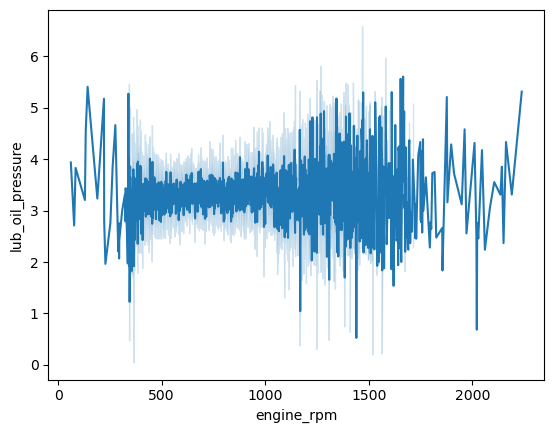

In [ ]:
sns.lineplot(traindf, x="engine_rpm", y="lub_oil_pressure")

<Axes: xlabel='coolant_pressure', ylabel='lub_oil_pressure'>

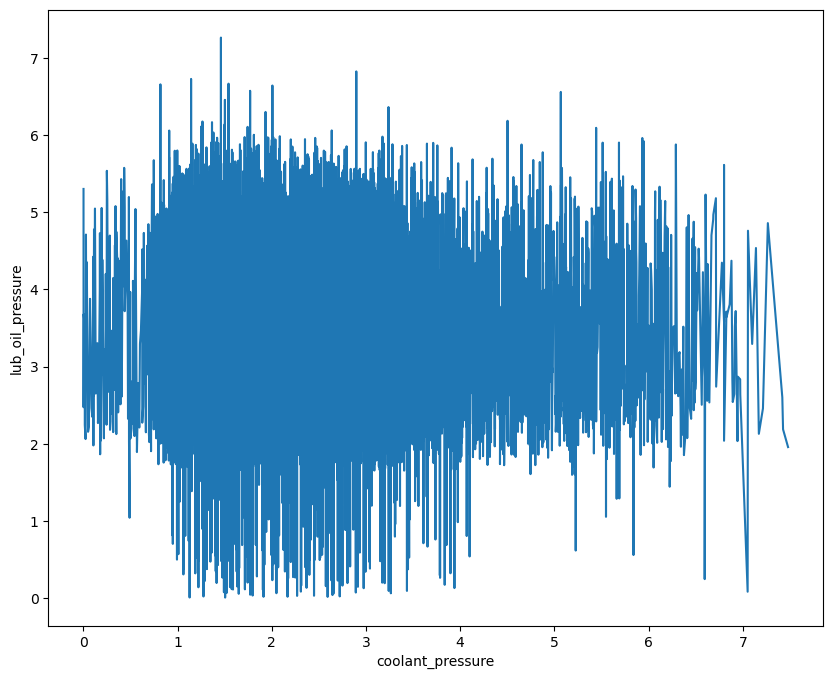

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(traindf, x="coolant_pressure", y="lub_oil_pressure")

In [ ]:
train.c

## **3. Data Preparation**<hr>

## **4. Modelling**<hr>

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline


In [ ]:
base = LogisticRegression()
base = base.fit(X, y)

c:\Users\USER\anaconda3\envs\ben\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Xt = testdf.drop(columns=["engine_condition"])
yt = testdf["engine_condition"]
yp = base.predict(Xt)

In [ ]:
def analyze_model(name, model, Xtest=Xt, ytest=yt):
    ypred = model.predict(Xtest)
    line = "--------------------"
    print(f"{line} {name} model analytics {line}\n")
    cm = confusion_matrix(ytest, ypred)
    print(f"accuracy score = {accuracy_score(ytest, ypred)}")
    print(f"recallscore = {recall_score(ytest, ypred)}")
    print(f"f1 score = {f1_score(ytest, ypred)}")
    print(f"confusion matrix = \n{cm}")
    print(classification_report(ytest, ypred))
    ConfusionMatrixDisplay.from_estimator(model, Xtest, ytest, normalize='true', cmap='Blues', display_labels=["Unhealthy", "Healthy"])

-------------------- base model analytics --------------------

accuracy score = 0.6613770156130023
recallscore = 0.8781973203410475
f1 score = 0.7657992565055762
confusion matrix = 
[[ 421 1023]
 [ 300 2163]]
              precision    recall  f1-score   support

           0       0.58      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.58      3907
weighted avg       0.64      0.66      0.63      3907



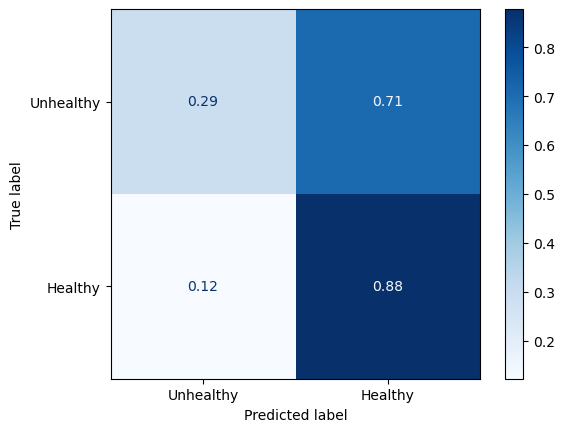

In [ ]:
analyze_model("base", base)

-------------------- Enhanced base model analytics --------------------

accuracy score = 0.6519068338878935
recallscore = 0.6853430775477061
f1 score = 0.7128378378378378
confusion matrix = 
[[ 859  585]
 [ 775 1688]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1444
           1       0.74      0.69      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



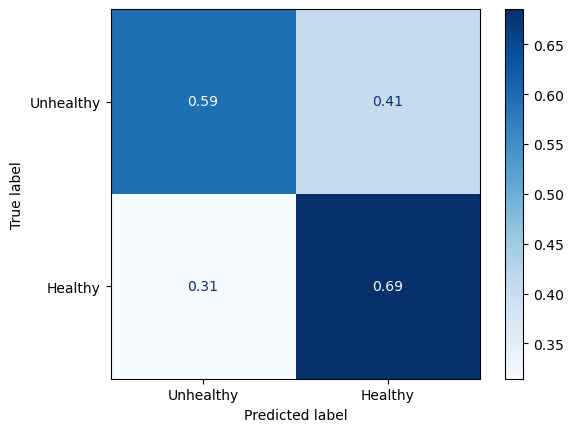

In [ ]:
en_base = LogisticRegression(max_iter=1000, class_weight="balanced")
en_base.fit(X,y)
analyze_model("Enhanced base", en_base)

In [ ]:
scores = cross_val_score(en_base, X, y, scoring='accuracy')
print(scores)
print(scores.mean())

[0.63339731 0.64075496 0.64395393 0.65024    0.66912   ]
0.6474932412028152


-------------------- pipeline log model analytics --------------------

accuracy score = 0.6519068338878935
recallscore = 0.6853430775477061
f1 score = 0.7128378378378378
confusion matrix = 
[[ 859  585]
 [ 775 1688]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1444
           1       0.74      0.69      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



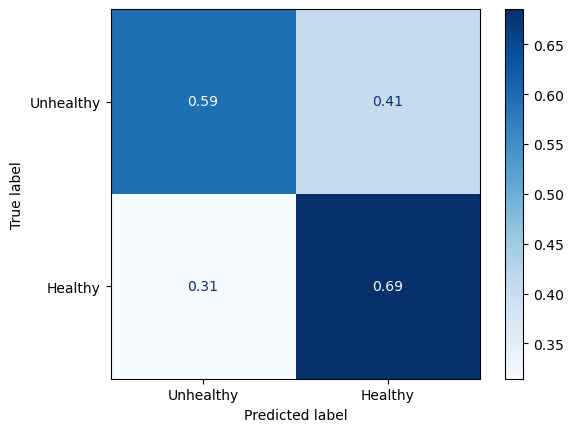

In [ ]:
# Using scaled data with logistic regression
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", LogisticRegression(class_weight="balanced"))
])

pipe_log.fit(X, y)

analyze_model("pipeline log", model=pipe_log)

In [ ]:
pipe_log.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('estimator', LogisticRegression(class_weight='balanced'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'estimator': LogisticRegression(class_weight='balanced'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'estimator__C': 1.0,
 'estimator__class_weight': 'balanced',
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'deprecated',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False}

-------------------- Grid log_reg model analytics --------------------

accuracy score = 0.6513949321730228
recallscore = 0.6845310596833131
f1 score = 0.7122940430925222
confusion matrix = 
[[ 859  585]
 [ 777 1686]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1444
           1       0.74      0.68      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



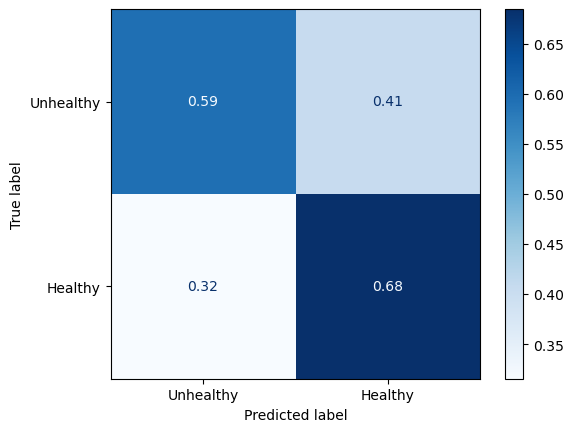

In [ ]:
# Trying grid search on logistic regression
log_param_grid = {
     "C": [ 43,44, 45, 46, 48],
   
    "max_iter": [150, 200, 250 ]
}

recall_unhealthy = make_scorer(recall_score, pos_label=0)

grid_log = GridSearchCV(
    LogisticRegression(penalty="l1", solver="liblinear", class_weight="balanced"),
    log_param_grid,
    scoring=recall_unhealthy,
    cv=5,
    n_jobs=-1
)

grid_log.fit(X, y)

analyze_model("Grid log_reg", grid_log)

In [ ]:
grid_log.best_estimator_

,penalty,'l1'
,dual,False
,tol,0.0001
,C,44
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,250
,multi_class,'deprecated'


Trying SVM

-------------------- SVM model analytics --------------------

accuracy score = 0.6163296647043768
recallscore = 0.587088915956151
f1 score = 0.6586199043498064
confusion matrix = 
[[ 962  482]
 [1017 1446]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56      1444
           1       0.75      0.59      0.66      2463

    accuracy                           0.62      3907
   macro avg       0.62      0.63      0.61      3907
weighted avg       0.65      0.62      0.62      3907



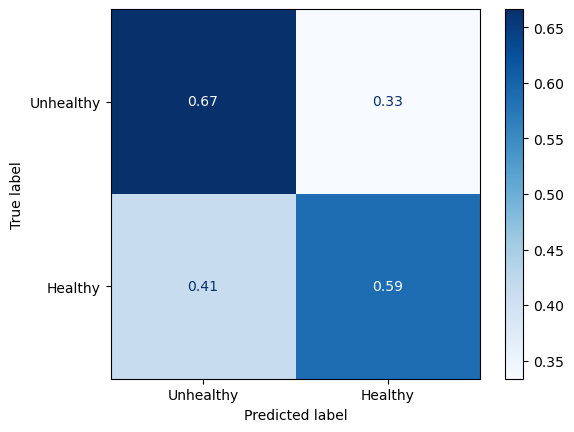

In [ ]:
sv_model = svm.SVC(class_weight="balanced")
sv_model.fit(X, y)

analyze_model("SVM", sv_model)

-------------------- pipeline svm model analytics --------------------

accuracy score = 0.6416687995904786
recallscore = 0.6183516037352822
f1 score = 0.6851102114260009
confusion matrix = 
[[ 984  460]
 [ 940 1523]]
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      1444
           1       0.77      0.62      0.69      2463

    accuracy                           0.64      3907
   macro avg       0.64      0.65      0.63      3907
weighted avg       0.67      0.64      0.65      3907



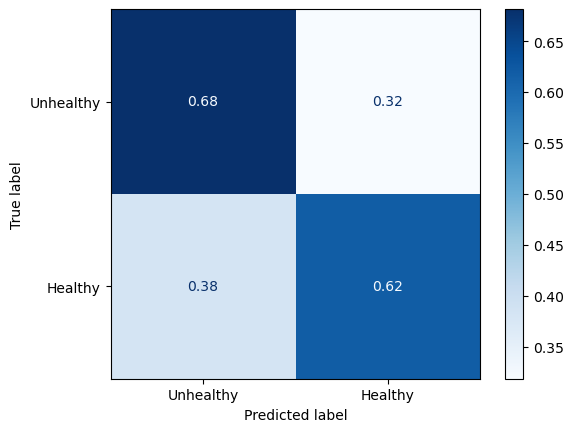

In [ ]:
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", svm.SVC(class_weight="balanced"))
])

pipe_svm.fit(X, y)

analyze_model("pipeline svm", model=pipe_svm)

In [ ]:
pipe_svm.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('estimator', SVC(class_weight='balanced'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'estimator': SVC(class_weight='balanced'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': 'balanced',
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False}

-------------------- Grid SVC model analytics --------------------

accuracy score = 0.6163296647043768
recallscore = 0.587088915956151
f1 score = 0.6586199043498064
confusion matrix = 
[[ 962  482]
 [1017 1446]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56      1444
           1       0.75      0.59      0.66      2463

    accuracy                           0.62      3907
   macro avg       0.62      0.63      0.61      3907
weighted avg       0.65      0.62      0.62      3907



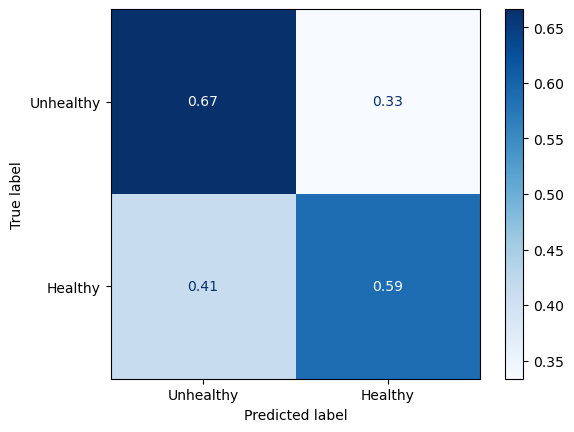

In [ ]:
svc_param_grid = {
    "C": [0.1, 1, 10],
}
grid_svc = GridSearchCV(
    svm.SVC(class_weight="balanced"),
    svc_param_grid,
    #scoring=recall_unhealthy,
    cv=5,
    n_jobs=-1
)

grid_svc.fit(X, y)

analyze_model("Grid SVC", grid_svc)

Trying decision tree classifier

-------------------- Tree model analytics --------------------

accuracy score = 0.5835679549526491
recallscore = 0.680470970361348
f1 score = 0.6732275557340831
confusion matrix = 
[[ 604  840]
 [ 787 1676]]
              precision    recall  f1-score   support

           0       0.43      0.42      0.43      1444
           1       0.67      0.68      0.67      2463

    accuracy                           0.58      3907
   macro avg       0.55      0.55      0.55      3907
weighted avg       0.58      0.58      0.58      3907



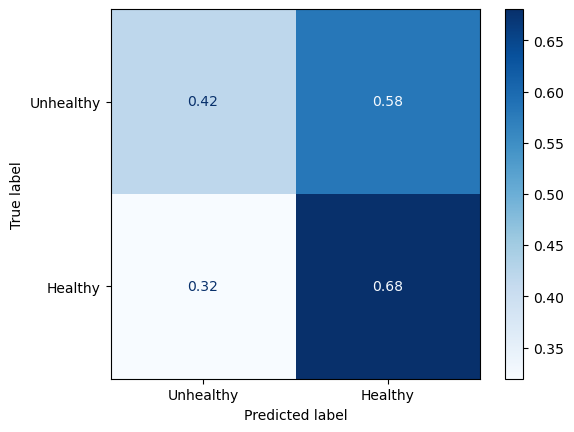

In [ ]:
tree = DecisionTreeClassifier(class_weight="balanced")
tree.fit(X,y)



analyze_model("Tree", tree)

-------------------- pipeline tree model analytics --------------------

accuracy score = 0.5868953160993089
recallscore = 0.6857490864799025
f1 score = 0.6766826923076923
confusion matrix = 
[[ 604  840]
 [ 774 1689]]
              precision    recall  f1-score   support

           0       0.44      0.42      0.43      1444
           1       0.67      0.69      0.68      2463

    accuracy                           0.59      3907
   macro avg       0.55      0.55      0.55      3907
weighted avg       0.58      0.59      0.58      3907



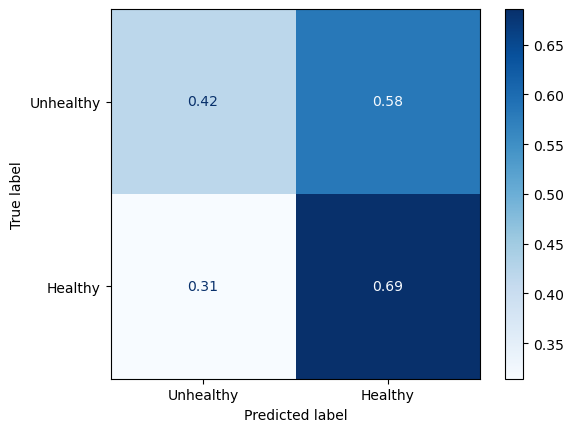

In [ ]:
pipe_tree = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", DecisionTreeClassifier(class_weight="balanced"))
])

pipe_tree.fit(X, y)

analyze_model("pipeline tree", model=pipe_tree)

## **5. Evaluation**<hr>